## Assessing the chosen designs

In the following I make some images to help assess the designs that were chosen according to the psych/vif/eff measures.  Note, I ran an initial design selection and after Patrick assessed those designs I repeated the selection for some tasks.  Sometimes I simply added more designs and in other cases (Nback and AX-CPT) I reran the design generation.  These images are intended to help select the new designs, when needed.

In [1]:
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
rootdir = '/Users/jeanettemumford/Dropbox/Research/Projects/patrick/efficiency_rdoc'

### Stop signal

Nothing was changed from the original design selection.

In [3]:
def plot_maker(rootdir, task_name, models_omitted=[]):
    try:
        model_assess_orig = pd.read_csv(f'{rootdir}/final_designs/{task_name}/{task_name}_model_assessment_values.csv')  
        model_assess_orig.rename(columns={'Unnamed: 0': 'design_number'}, inplace=True)
    except:
        model_assess_orig = None    
    model_assess_new = pd.read_csv(f'{rootdir}/final_designs_with_extras/{task_name}/{task_name}_model_assessment_values.csv')
    model_assess_new.rename(columns={'Unnamed: 0': 'design_number'}, inplace=True)
    model_assess_new['new_design'] = 0
    model_assess_new['already_omitted'] = 0
    for idx, design_num in enumerate(model_assess_new['design_number'].values):
        if (model_assess_orig is not None) and (design_num not in model_assess_orig['design_number'].values):
            model_assess_new.loc[idx, 'new_design'] = 1
        if design_num in models_omitted:
            model_assess_new.loc[idx, 'already_omitted'] = 1
            
    model_assess_new.sort_values(['already_omitted', 'new_design'], ascending=False, inplace=True)

    model_assess_new['design_number'] = model_assess_new['design_number'].astype(str)
    trial_num = []
    trial_type = []
    design_number = []
    for des_num in model_assess_new['design_number'].values:
        already_omitted = model_assess_new[model_assess_new['design_number'] == des_num]['already_omitted'].values[0]
        new_design = model_assess_new[model_assess_new['design_number'] == des_num]['new_design'].values[0]
        if already_omitted == 1:
            des_name = f'{des_num}_omitted'
            model_assess_new.loc[model_assess_new['design_number'] == des_num, 'design_number'] = f'{des_num}_omitted'
        elif new_design == 1:
            des_name = f'{des_num}_new'
            model_assess_new.loc[model_assess_new['design_number'] == des_num, 'design_number'] = f'{des_num}_new'
        else:
            des_name = f'{des_num}' 
        data = pd.read_csv(f'{rootdir}/final_designs_with_extras/{task_name}/{task_name}_events_{des_num}.csv')
        n_trials = data.shape[0]
        trial_num.extend(list(np.arange(n_trials)))
        design_number.extend([des_name]*n_trials)
        trial_type.extend(data['trial_type'])

    dat_plot = pd.DataFrame({'trial_num': trial_num, 'trial_type': trial_type, 'design_number': design_number})

    # For ax-cpt I'll just show the stimulus type (so whether the trial is ax/ay/bx/by)
    if 'ax_cpt' in task_name:
        dat_plot = dat_plot[dat_plot['trial_type'].str.contains('stim|break')]

    n_designs = model_assess_new.shape[0]
    fig, ax = plt.subplots(figsize=(18, n_designs/2))
    sns.stripplot(data = dat_plot, x = 'trial_num', y = 'design_number', hue = 'trial_type', jitter=False,
                  hue_order=np.sort(dat_plot['trial_type'].unique()))
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    #ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_title(f'Trial orderings for {task_name}')
    plt.show()
    try:
        model_assess_new.drop(columns = ['design_index'], inplace=True)
    except:
        pass
    fig, ax = plt.subplots(figsize=(18, n_designs/2))
    model_assess_new['scan_length_div_1000'] = model_assess_new['scan_length'].copy()/1000
    model_assess_new.drop(columns = ['scan_length', 'new_design', 'already_omitted'], inplace=True)
    model_assess_new.set_index(model_assess_new['design_number'].copy().values, inplace=True)
    model_assess_new.drop(columns = ['design_number'], inplace=True)
    sns.heatmap(model_assess_new, annot=True, fmt=".4g")
    plt.title(f'Model assessment values for {task_name}')
    plt.show()

## Stop signal
Initial thoughts were that the original design selection was fine, so no new designs were generated

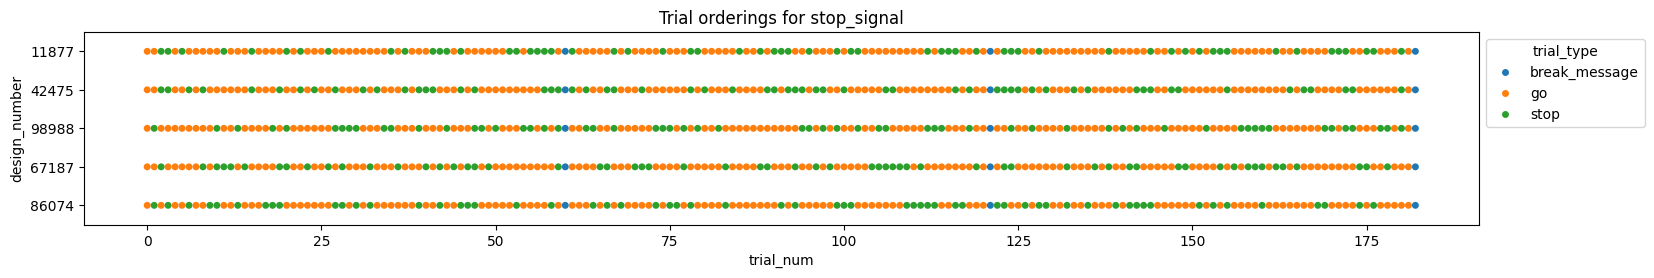

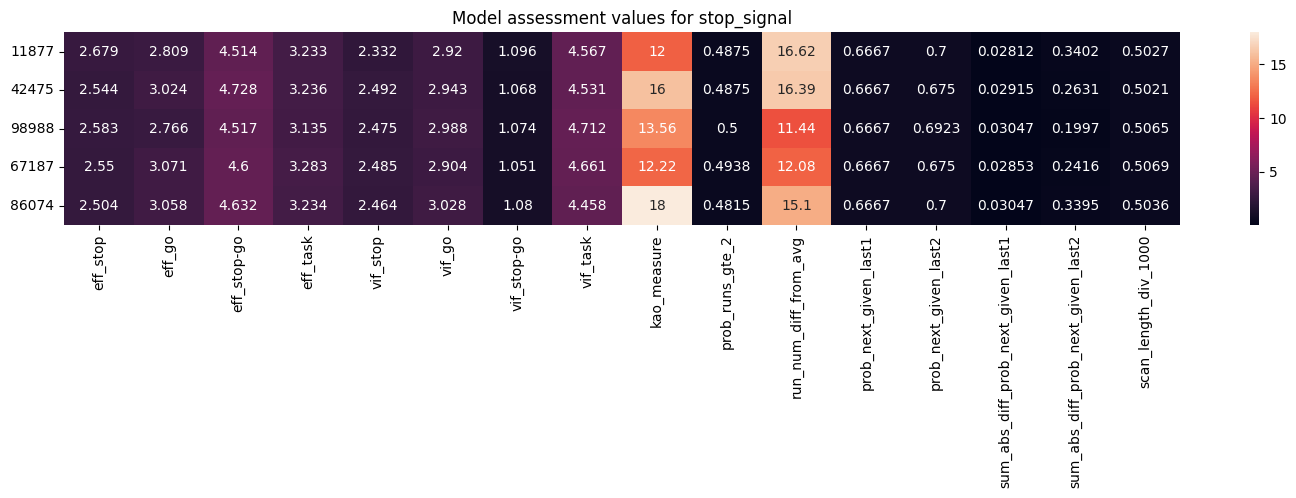

In [4]:
plot_maker(rootdir, 'stop_signal')

## Flanker/Stroop

Recall, you'll choose 5 for flanker and 5 for stroop from this collection.  Previously 1166 seemed blocky, so I generated 5 extra designs from which to choose a replacement

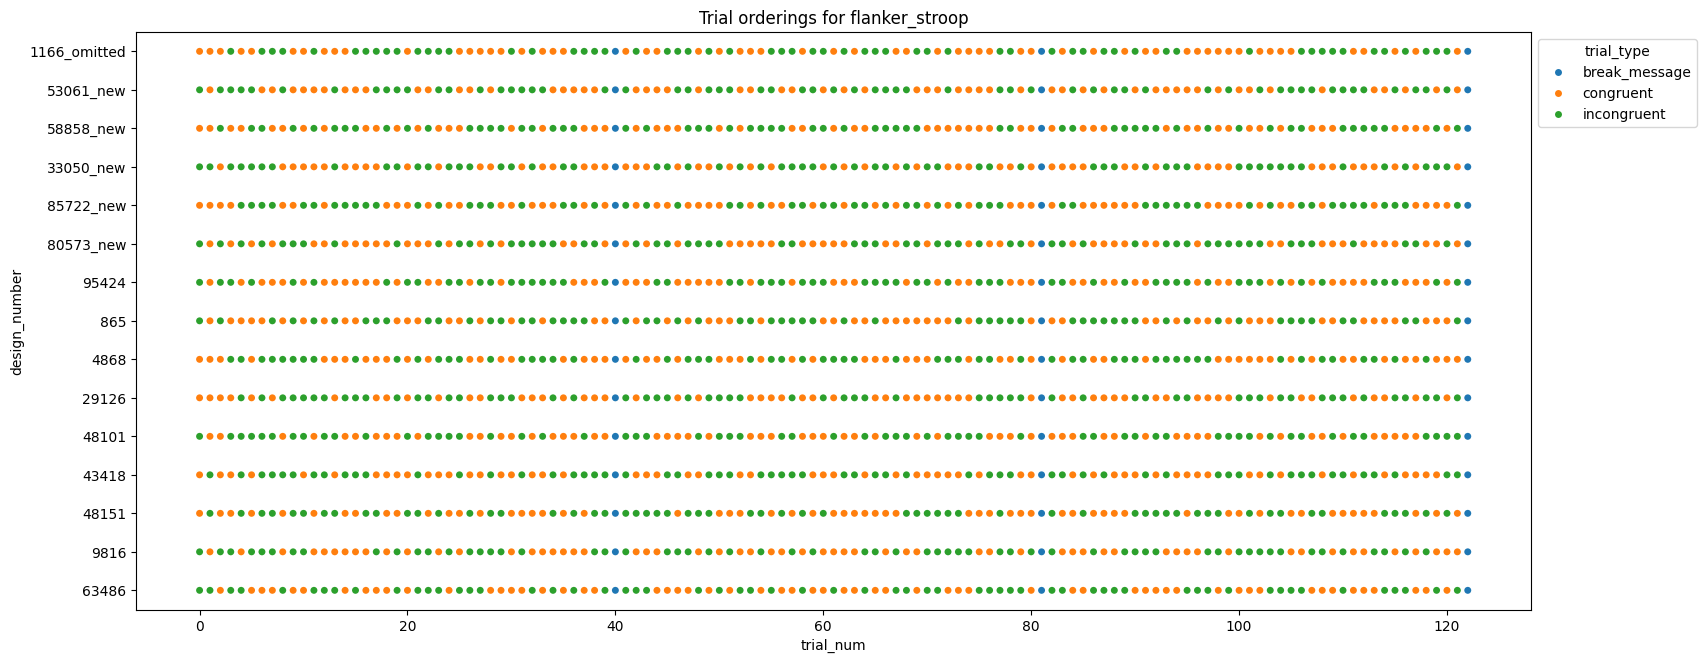

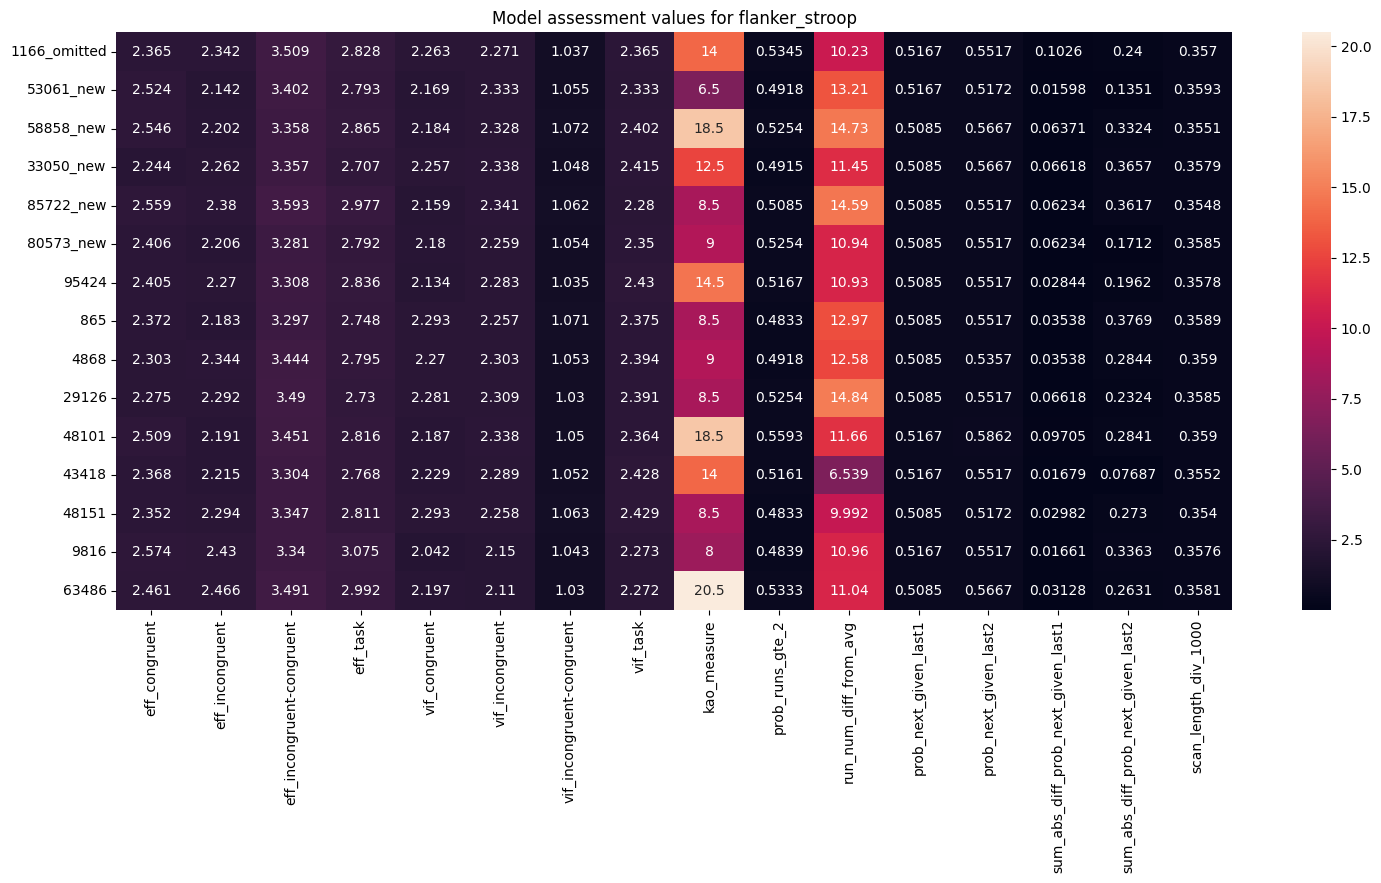

In [5]:
plot_maker(rootdir, 'flanker_stroop', models_omitted=[1166])

## Go-No Go

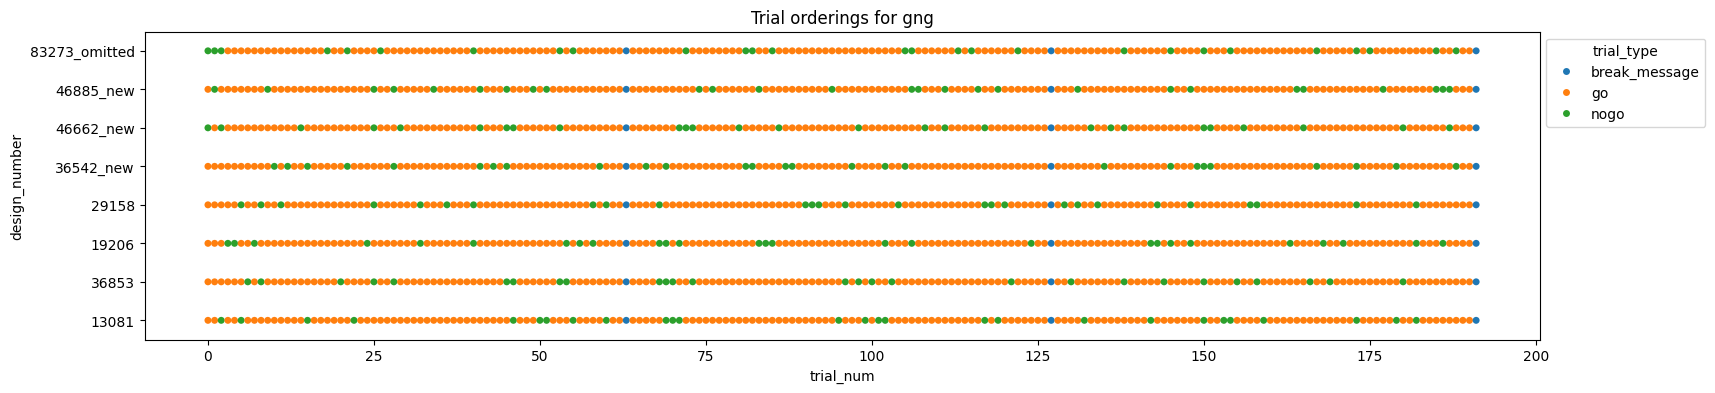

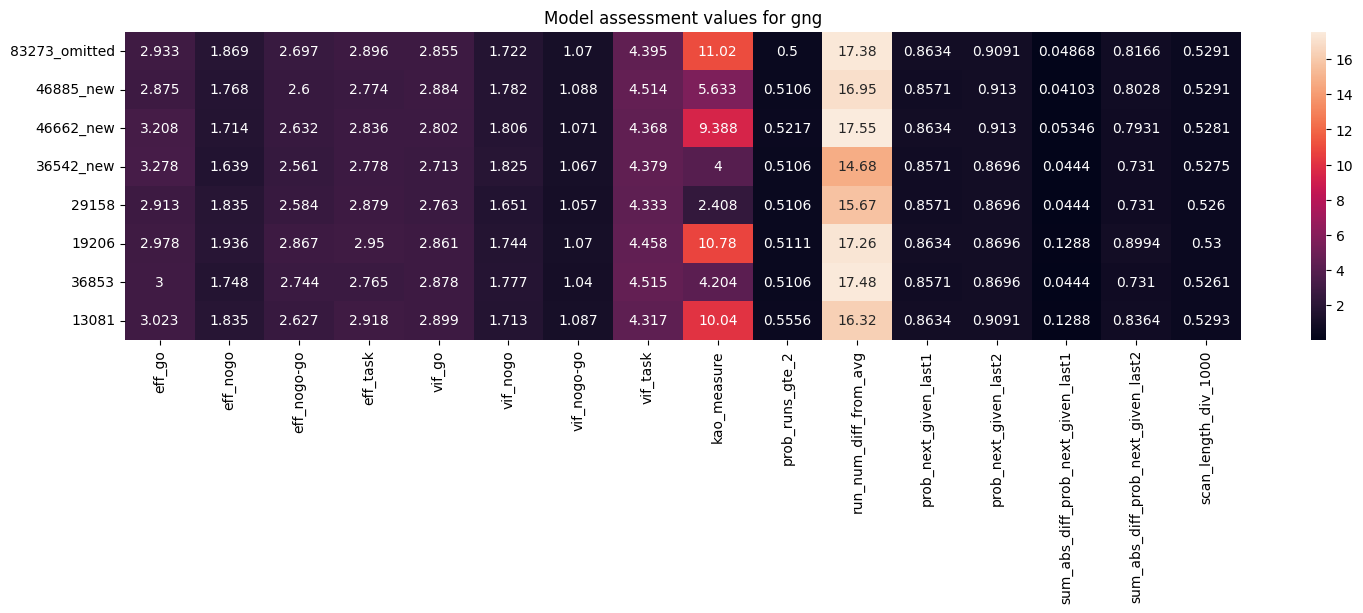

In [6]:
plot_maker(rootdir, 'gng', models_omitted=[83273])

## AX-CPT

The psychological measures here only account for whether the cue for the trial was A or B (so the X/Y stimulus was not considered).  

Note, I've run this two different ways.  Following this I use a second approach where I first select the top 500 designs using the AX/AY/BX/BY trial labels to assess the psych measures.  Then, out of those 500 designs I selected the top 8 using just the A/B labels in psych assessment.

I think this first set of designs is better in terms of the psych measures for A/B than the second set.  Given this, I feel the best strategy is to pick 5 designs from the top set and just eyeball for too many of the same AX/AY/BX/BY trial type in a row.

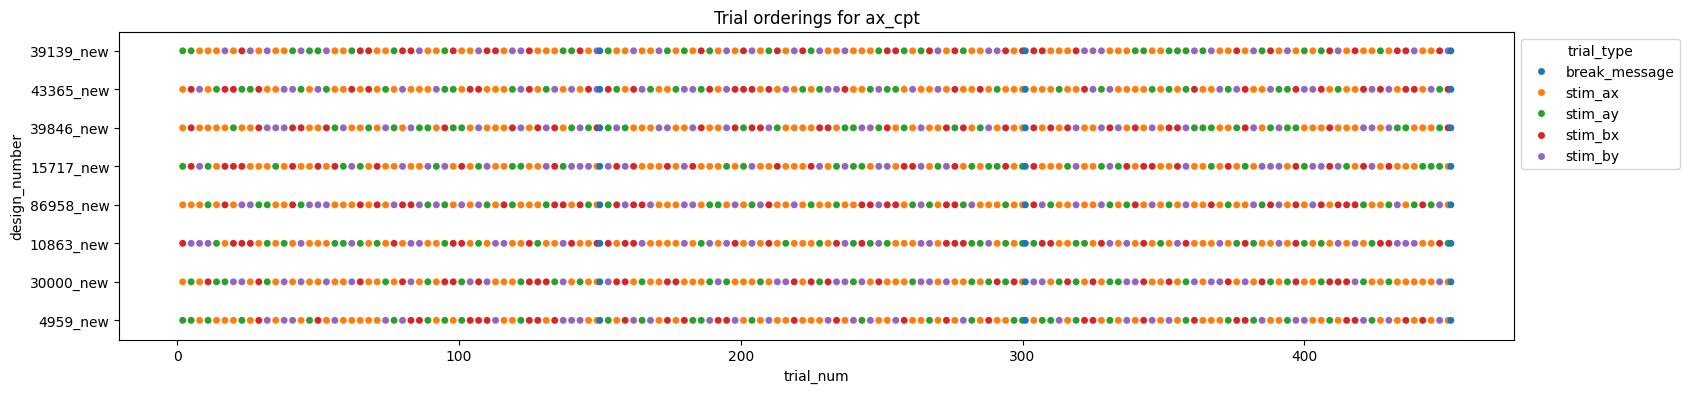

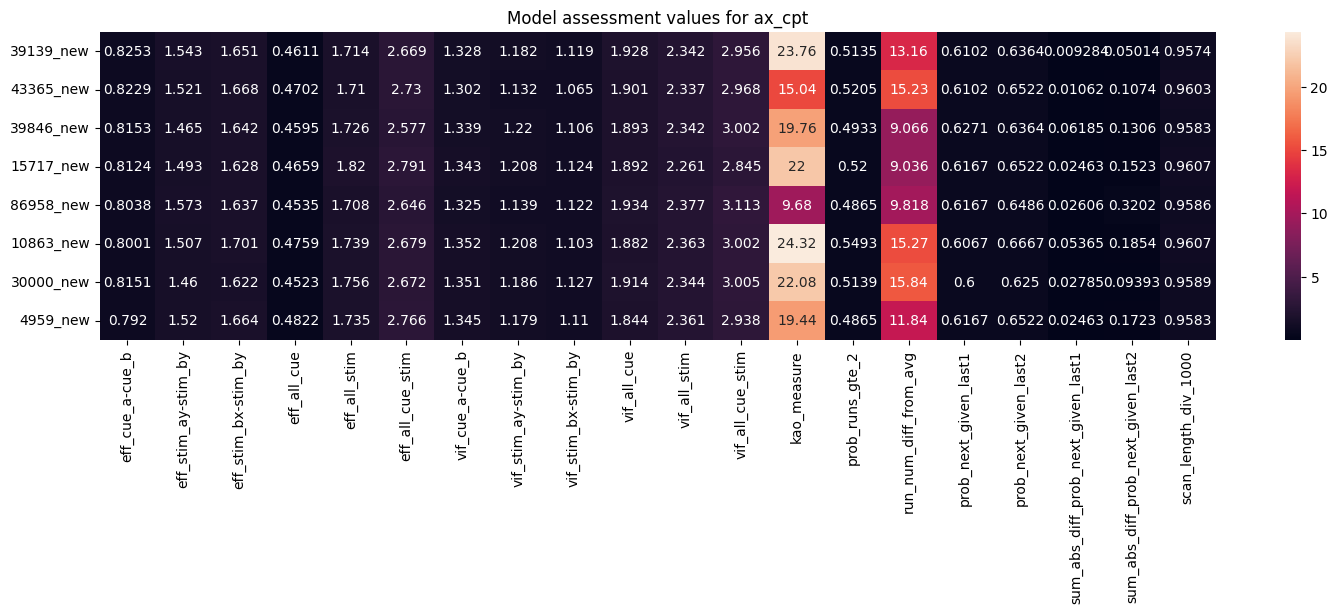

In [7]:
plot_maker(rootdir, 'ax_cpt', models_omitted=[])

### AX-CPT using the 2 stage strategy

The psych measures here reflect the A/B labels, so they are comparable to the above numbers.  I feel like the above might be a little better than these designs, since run_num_diff_from_avg tends to be higher as well as sum_abs_diff_prob_next_given_last2.

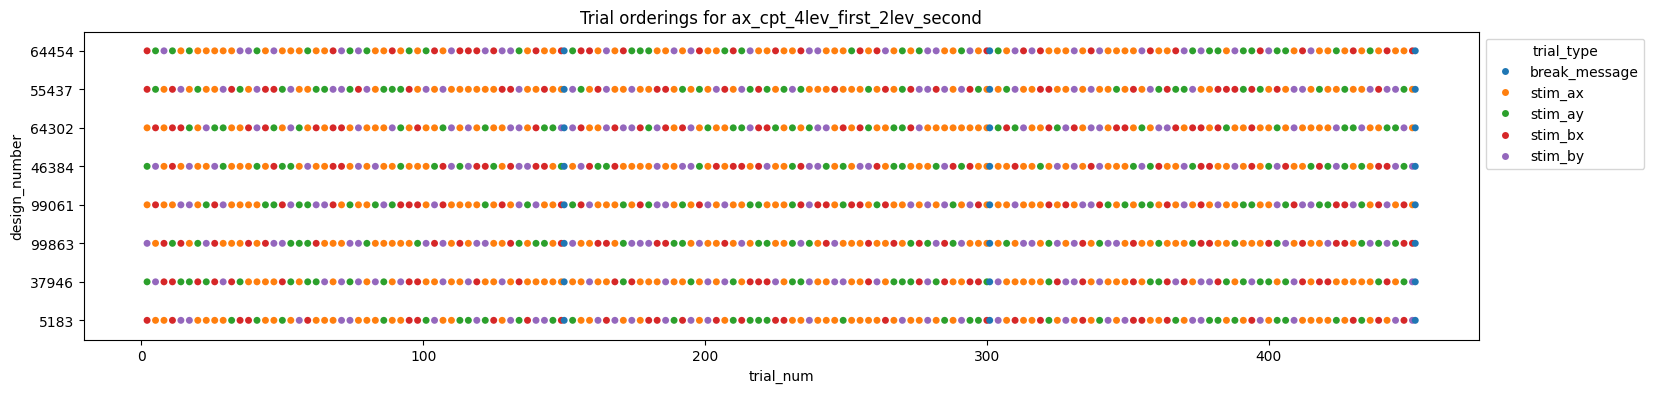

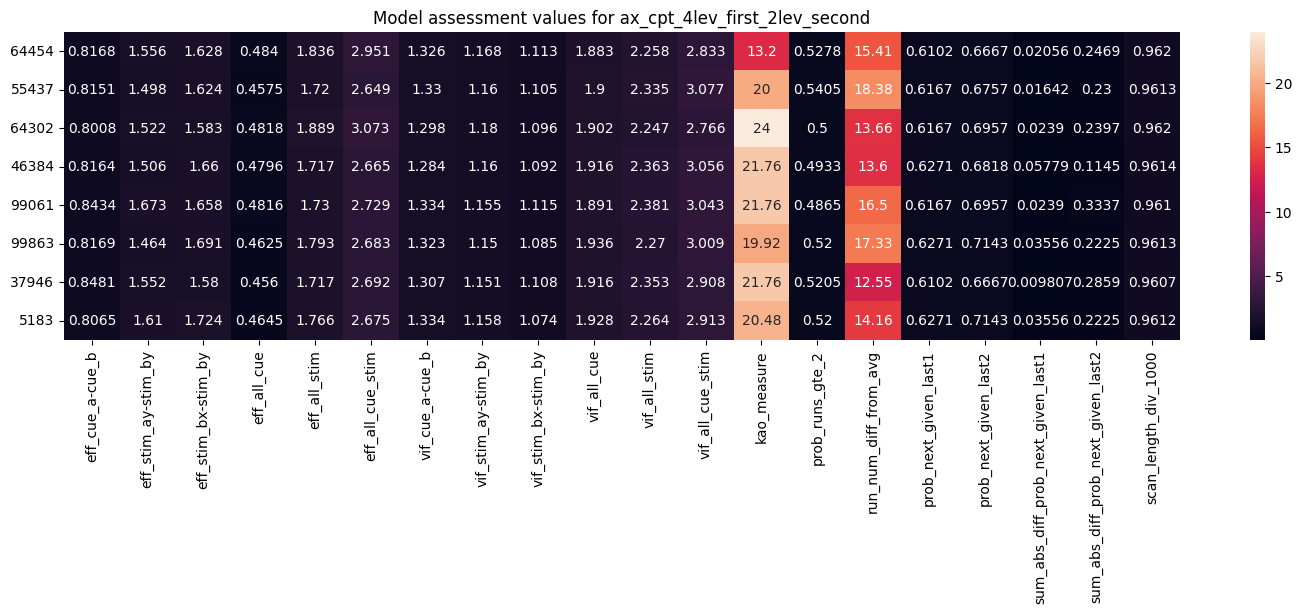

In [8]:
plot_maker(rootdir, 'ax_cpt_4lev_first_2lev_second', models_omitted=[])

## CuedTS and SpatialTS

Previously, 13450 and 32808 seemed a little blocky to Patrick, so I generated 5 new designs to choose from

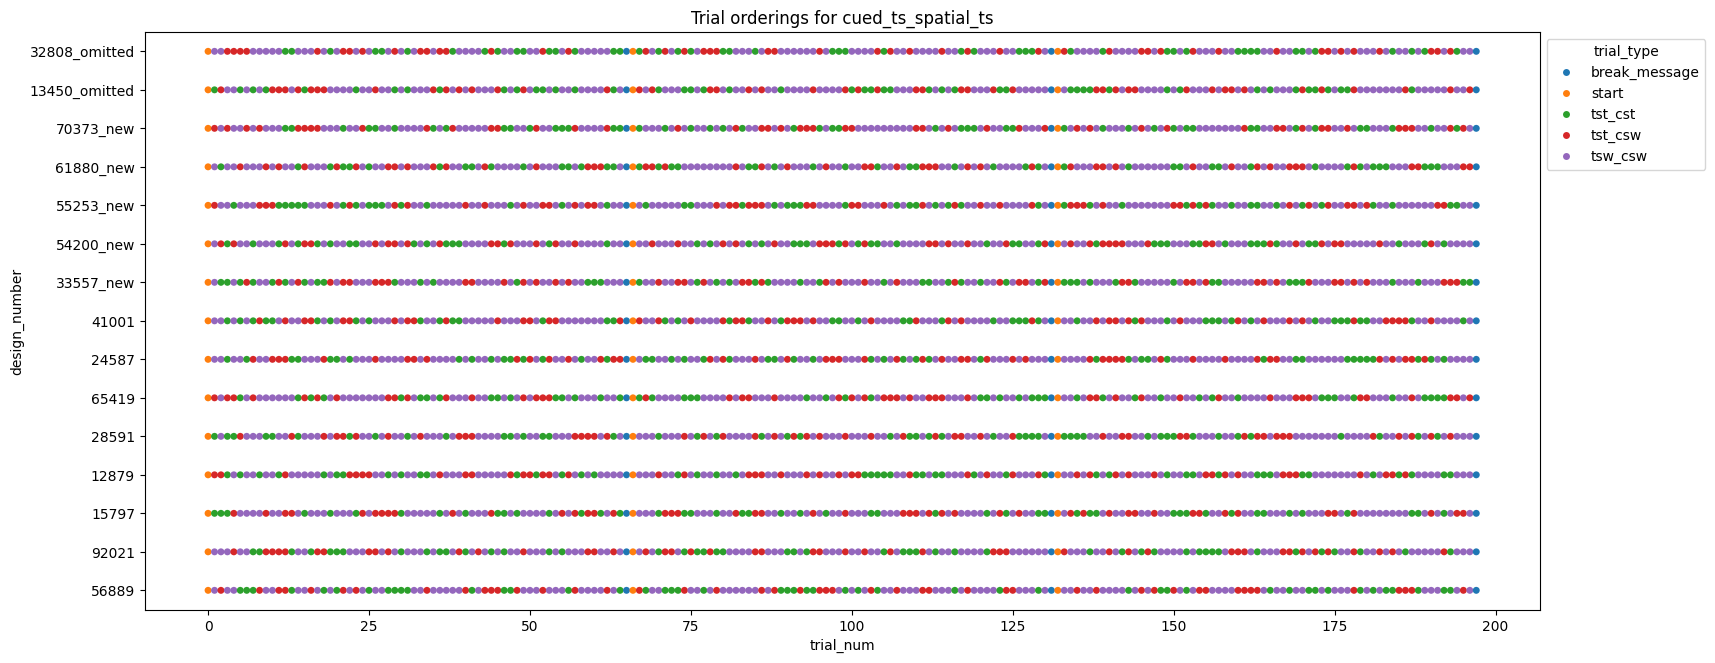

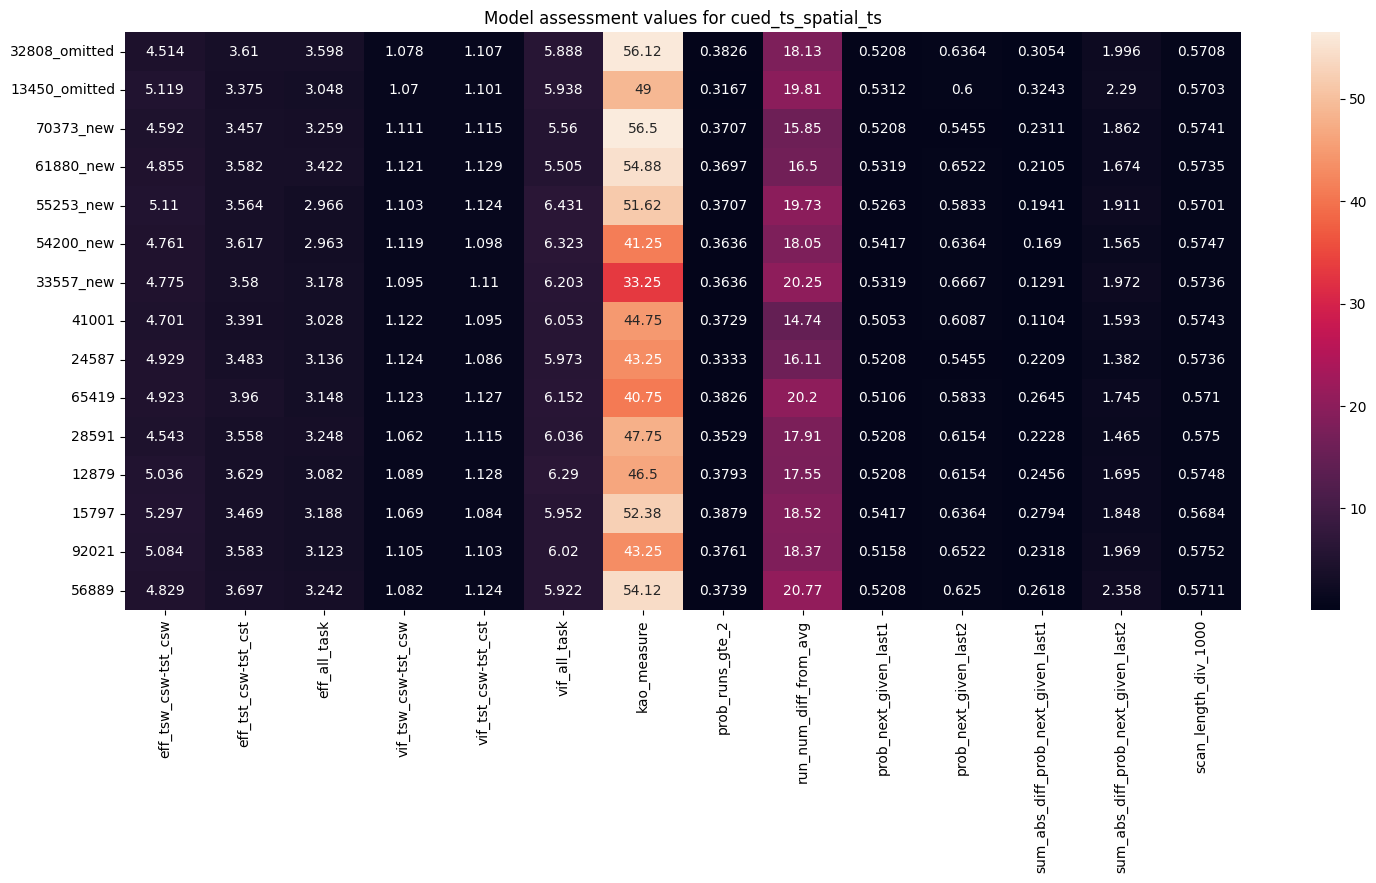

In [9]:
plot_maker(rootdir, 'cued_ts_spatial_ts', models_omitted=[13450, 32808])

## Nback
I previously hadn't randomized whether it started with 1back or 2back.  I've regenerated designs and half start with 1back and the other half start with 2back

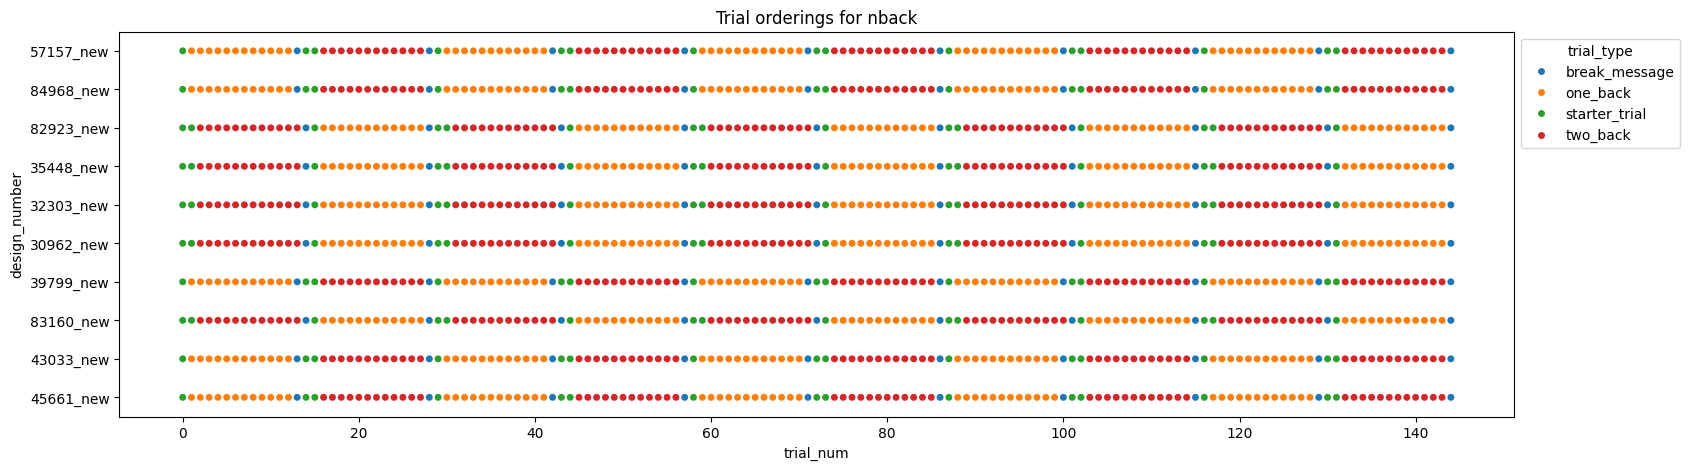

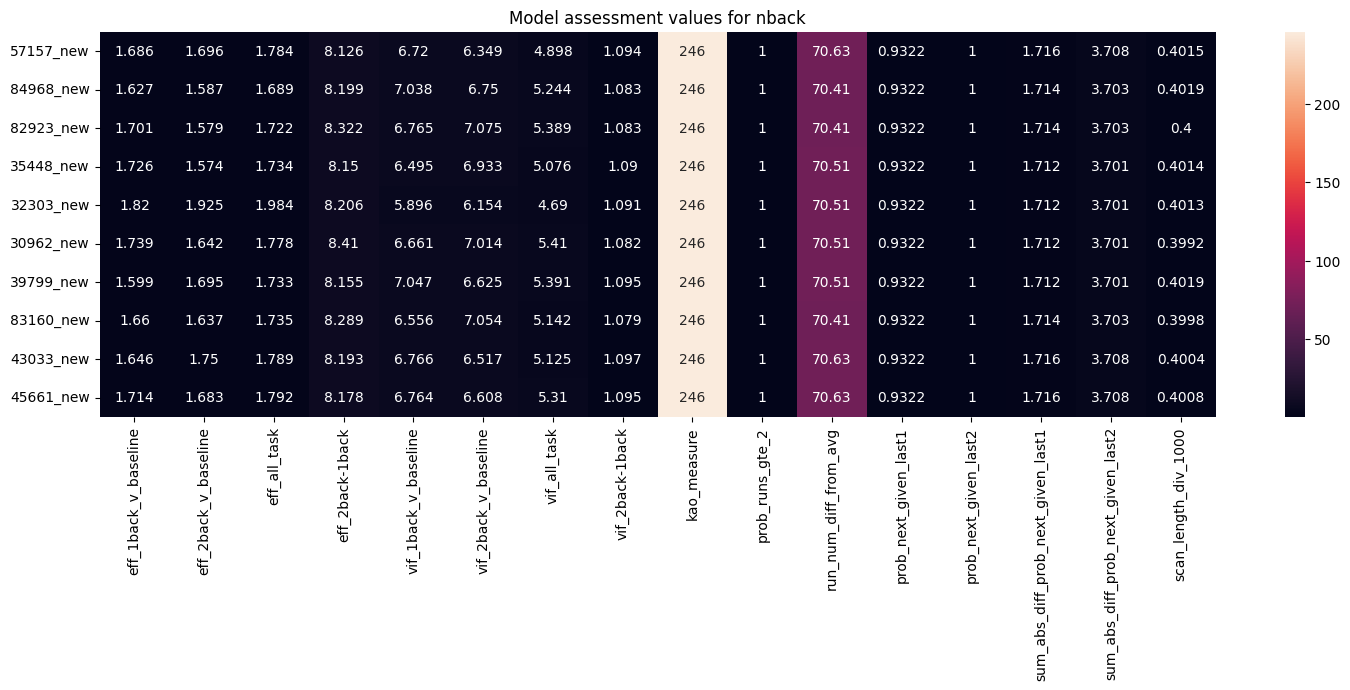

In [10]:
plot_maker(rootdir, 'nback', models_omitted=[])

## Span
No design was omitted, so I did not generate any new designs here

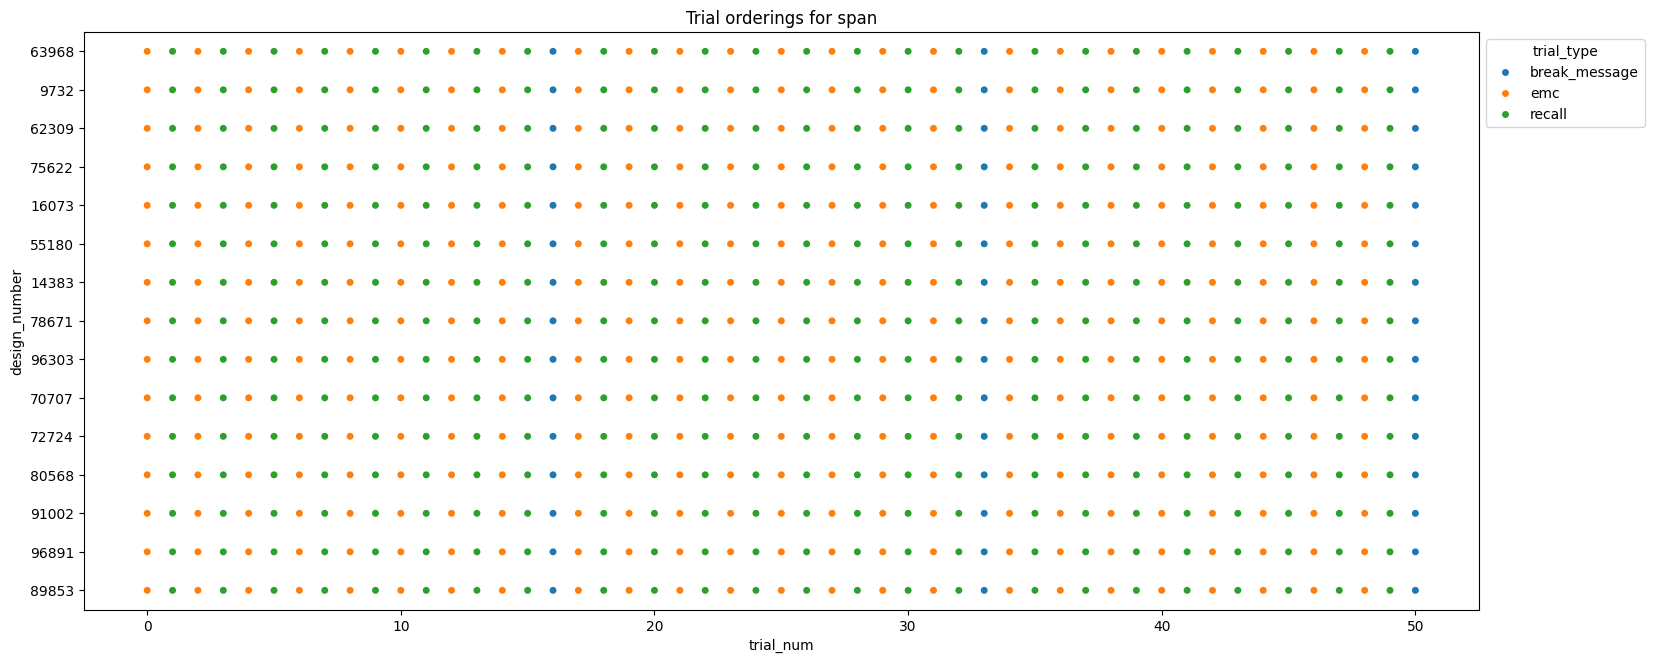

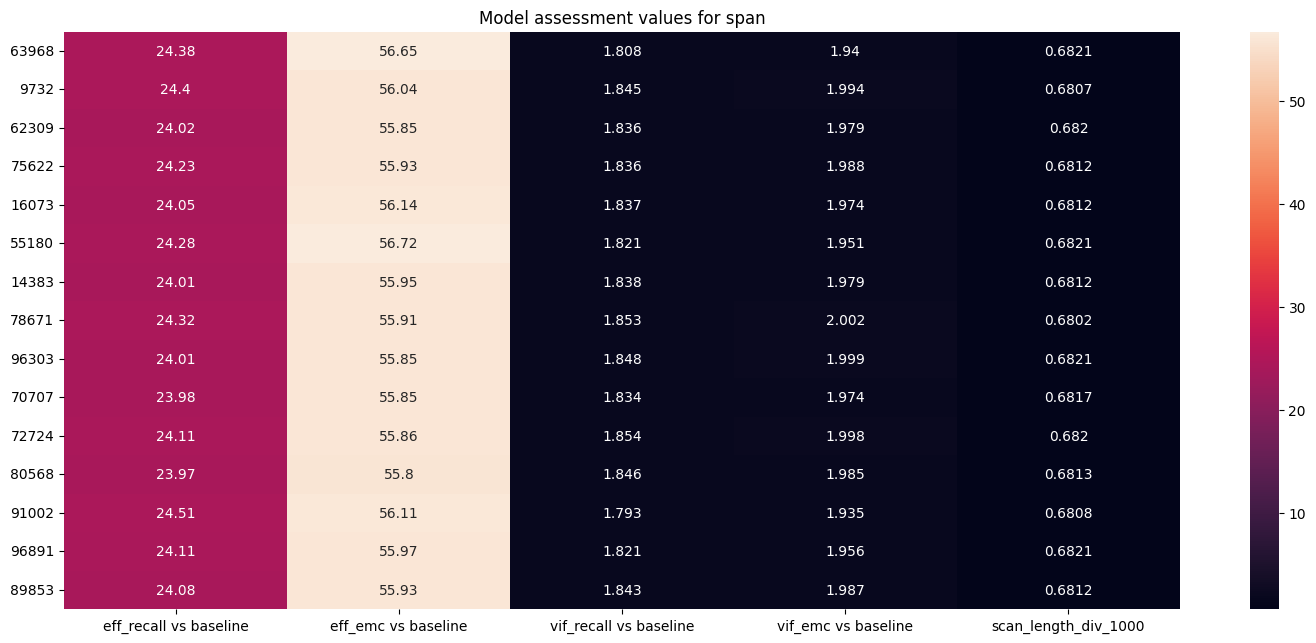

In [11]:
plot_maker(rootdir, 'span', models_omitted=[])

## Spatial cueing
Previously all designs seemed okay

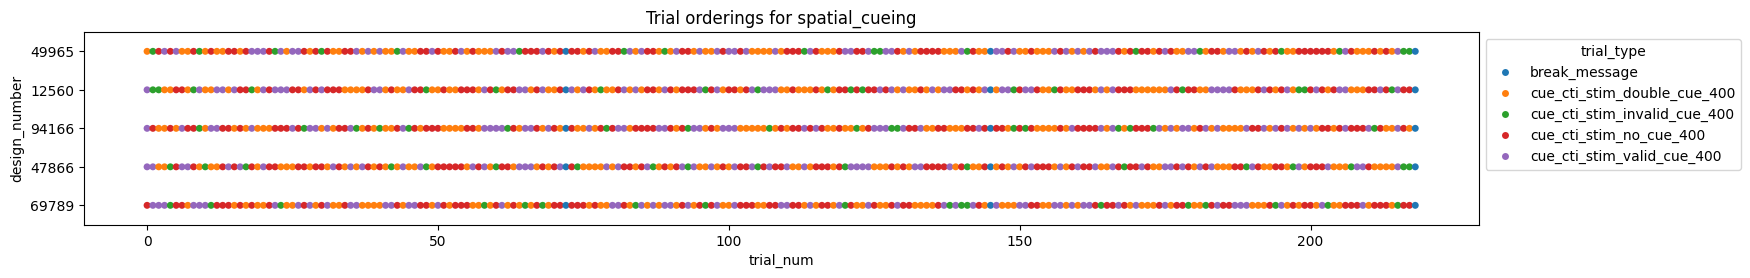

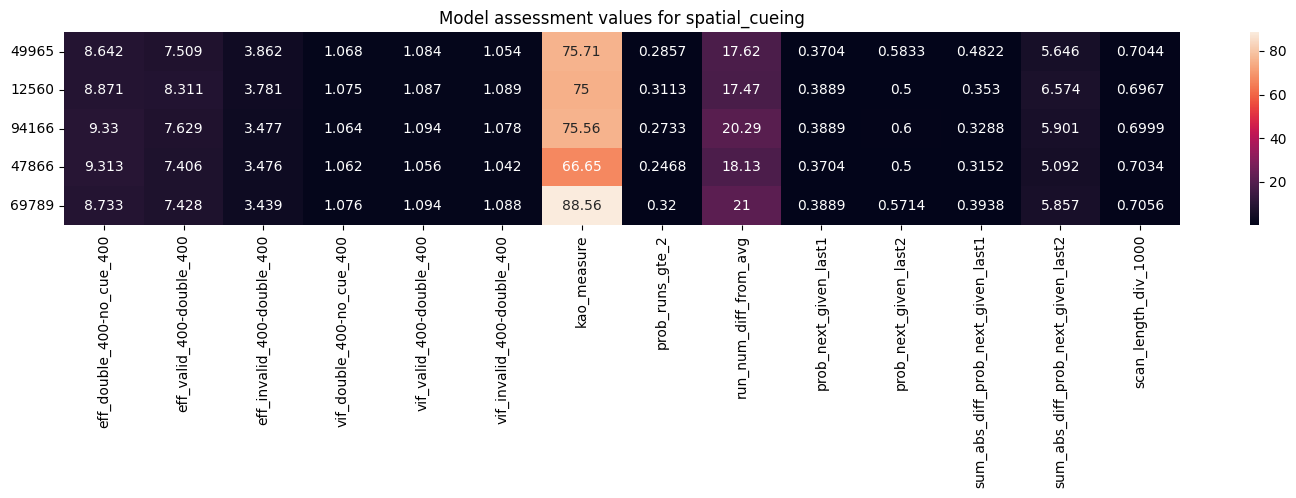

In [12]:
plot_maker(rootdir, 'spatial_cueing', models_omitted=[])

## Visual search
Everything looked okay upon the first pass.

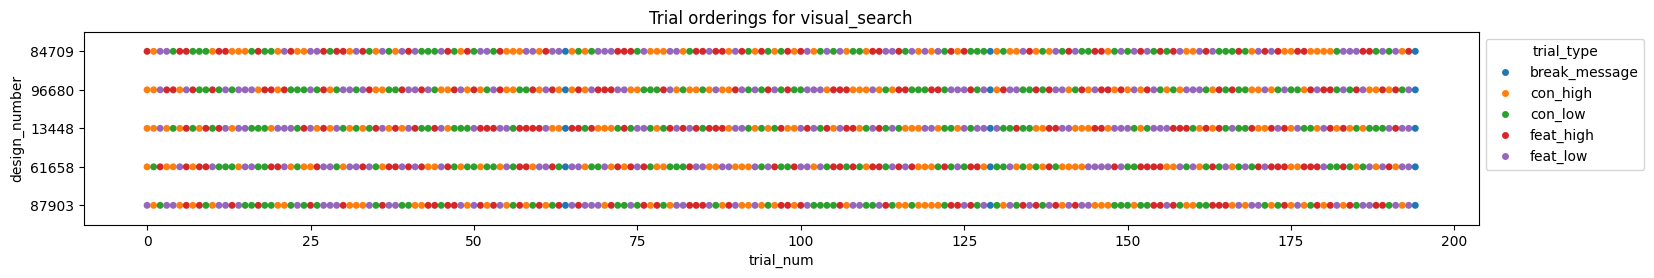

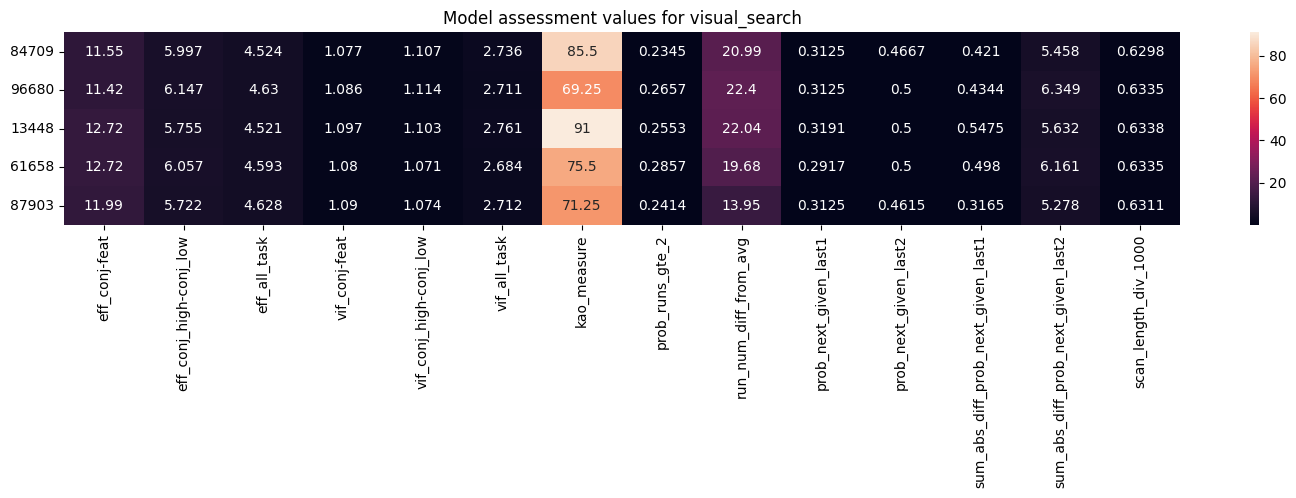

In [13]:
plot_maker(rootdir, 'visual_search', models_omitted=[])